In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from tqdm import tqdm

import seaborn as sns

N = 20000

fname = f'Jaffe_{N}_out_no_perturber.txt'

M = 1
m = M/N
Rs = 1
M_p = M/10

rho_0 = M / (4 * np.pi * (Rs)**3)

## Fetch the data

Durata simulazione: 230 minuti con 20000 particelle!

In [32]:
data = pd.read_csv(fname, names=list(range(7)), sep = ' ')

In [33]:
def dati (data,N,M_tot):

    x = []
    y = []
    z = []
    
    v_x = []
    v_y = []
    v_z = []
    
    start = N + 3
    step  = N * 3 + 3
    
    a = (np.array([data.iloc[i::step,:].copy() for i in range(start,start+N)]))
    for j in range(len(a)):
        temp = np.array([a[j][i][~np.isnan(a[j][i])] for i in range(len(a[j]))])
        
        x.append(temp[:,0])
        y.append(temp[:,1])
        z.append(temp[:,2])
        
    x = np.array(x)
    y = np.array(y)
    z = np.array(z)
    
    
    b = (np.array([data.iloc[i::step,:].copy() for i in range(start+N,start+(N)*2)]))
    
    for j in range(len(b)):
        temp = np.array([b[j][i][~np.isnan(b[j][i])] for i in range(len(b[j]))])
        
        v_x.append(temp[:,0])
        v_y.append(temp[:,1])
        v_z.append(temp[:,2])
     

    v_x = np.array(v_x)
    v_y = np.array(v_y)
    v_z = np.array(v_z)
    
    #cm
    cm_x = []
    cm_y = []
    cm_z = []
    
    # Centro di Massa del sistema di 20000 particelle uso mean e median
    cm_x.append(np.median(x[0:], axis=0))
    cm_y.append(np.median(y[0:], axis=0))
    cm_z.append(np.median(z[0:], axis=0))

    cm_x = np.array(cm_x[0])
    cm_y = np.array(cm_y[0])
    cm_z = np.array(cm_z[0])

    print('The initial center of mass is (', cm_x[0],', ', cm_y[0],', ', cm_z[0], ')')  
    print('The final center of mass is (', cm_x[-1],', ', cm_y[-1],', ', cm_z[-1], ')')
            
    cm_v_x = []
    cm_v_y = []
    cm_v_z = []        
        
    # Velocità del centro di massa Jaffe
    cm_v_x.append(np.median(v_x[1:], axis=0))
    cm_v_y.append(np.median(v_y[1:], axis=0))
    cm_v_z.append(np.median(v_z[1:], axis=0))

    cm_v_x = np.array(cm_v_x[0])
    cm_v_y = np.array(cm_v_y[0])
    cm_v_z = np.array(cm_v_z[0])
        
    
    r    = np.array([(x[i]**2+y[i]**2+z[i]**2)**0.5 for i in range(N)])
    cm_r = np.array([(cm_x[i]**2+cm_y[i]**2+cm_z[i]**2)**0.5 for i in range(len(cm_x))])
    
    
    t = (np.array(data.iloc[2::step,:].copy()))[:,2]
    
    return x,y,z,cm_x, cm_y, cm_z,v_x,v_y,v_z,cm_v_x,cm_v_y,cm_v_z,r,cm_r,t

In [34]:
x,y,z,cm_x,cm_y,cm_z,v_x,v_y,v_z,cm_vx,cm_vy,cm_vz,r,r_cm,time = dati(data, N, M)

The initial center of mass is ( 0.000617736925 ,  -0.000493046335 ,  0.00024474278 )
The final center of mass is ( 0.0843363255 ,  0.028813319 ,  0.00880732385 )


In [35]:
len(time)

301


100%|███████████████████████████████████| 20000/20000 [00:08<00:00, 2405.32it/s]


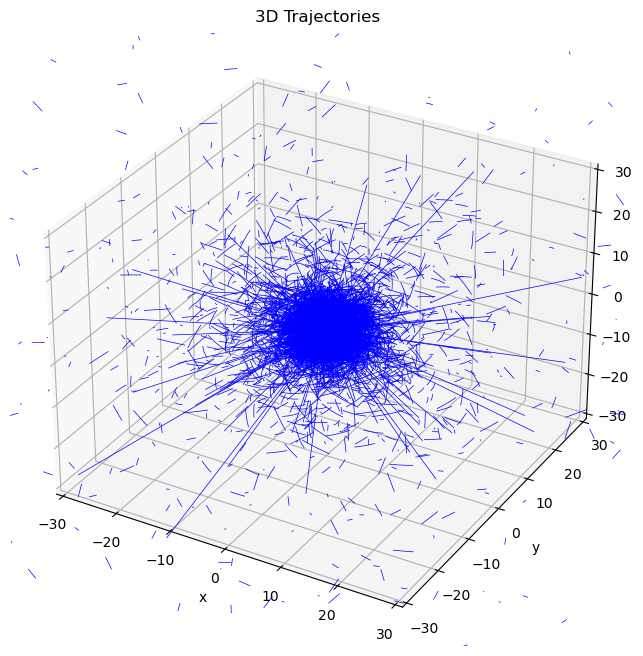

In [36]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(8,8))

for i in tqdm(range(0, N)):

    ax.plot(x[i, :], y[i, :], z[i, :], color='blue', linewidth=0.5)

    
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)
ax.set_zlim(-30, 30)

plt.title('3D Trajectories')
plt.show()

## Animation


100%|████████████████████████████████████████▊| 300/301 [00:11<00:00, 27.73it/s]

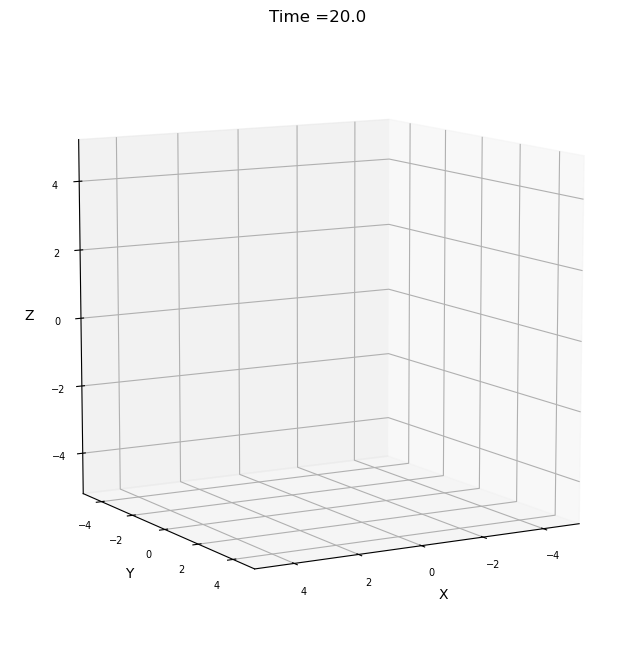


100%|████████████████████████████████████████▊| 300/301 [00:28<00:00, 27.73it/s]

In [38]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

#plot------------------------------------------------------------------------------

fig = plt.figure(figsize = (8,8))
ax  = fig.add_subplot(projection='3d')
ax.set_aspect('equal')

ax.view_init(elev=10, azim=60)
ax.set_xlim(-5,+5)
ax.set_ylim(-5,+5)
ax.set_zlim(-5,+5)


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.tick_params(axis='x', labelsize=7)
ax.tick_params(axis='y', labelsize=7)
ax.tick_params(axis='z', labelsize=7)


#animation--------------------------------------------------------------------------------
scatters, = ax.plot([], [], [], 'o', markersize='0.4', alpha=0.1)


def init():
    scatters.set_data([], [])
    scatters.set_3d_properties([])
    return scatters,

def animate_time(i): 
    scatters.set_data(x[:,i], y[:,i])
    scatters.set_3d_properties(z[:,i])
    ax.set_title('Time =' + str(np.round((np.array(time))[i])))
        
    return scatters,


num_frames = len(time)
animazione = FuncAnimation(fig, animate_time, frames=tqdm(range(len(time))), interval=100, init_func=init) #frames = num_frames interval =100

theta_ = np.linspace(0,2*np.pi,1000)

writergif = animation.PillowWriter(fps=10)
#writer = animation.PillowWriter(fps=30)
#animazione.save('plummer_sphere.gif', writer = 'ffmpeg', dpi=30)
animazione.save(f'Jaffe_{N}_test_no_pert.gif', writer = writergif)
#plt.show()

plt.rcParams['animation.html'] = 'html5'
#animazione

Now I plot the trajectory of the center of mass of the system

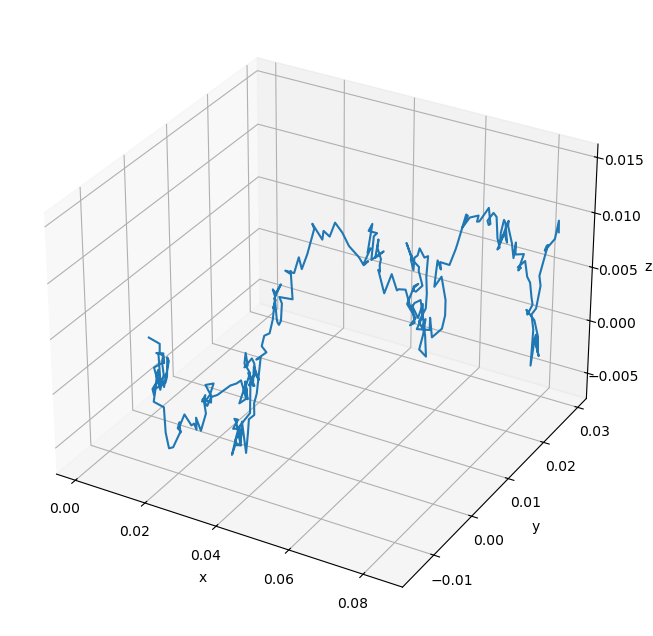

In [37]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(8,8))

ax.plot(cm_x, cm_y, cm_z, label=f"CM", linestyle='-')

    
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

#ax.set_xlim(-50, 50)
#ax.set_ylim(-50, 50)
#ax.set_zlim(-50, 50)

plt.show()

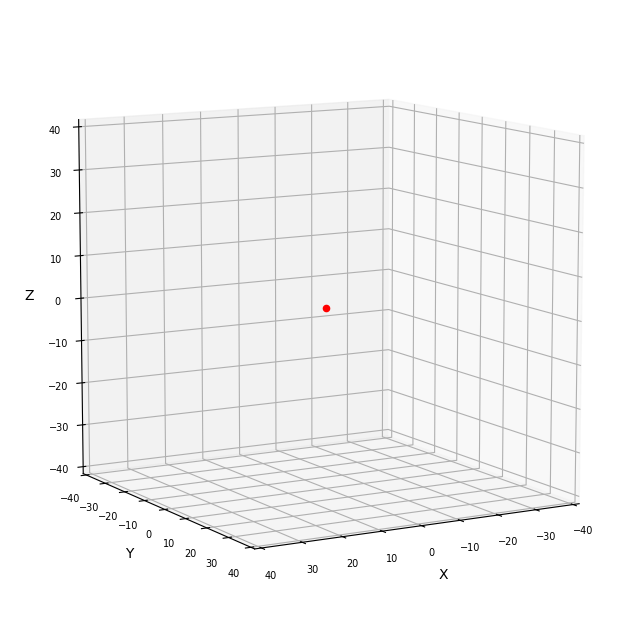

In [11]:
#plot------------------------------------------------------------------------------

fig = plt.figure(figsize = (8,8))
ax  = fig.add_subplot(projection='3d')
ax.set_aspect('equal')

ax.view_init(elev=10, azim=60)
ax.set_xlim(-40, +40)
ax.set_ylim(-40, +40)
ax.set_zlim(-40, +40)


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.tick_params(axis='x', labelsize=7)
ax.tick_params(axis='y', labelsize=7)
ax.tick_params(axis='z', labelsize=7)


#animation--------------------------------------------------------------------------------

# Initialize the plot with the initial center of mass position
scatter = ax.scatter([x_cm[0]], [y_cm[0]], [z_cm[0]], c='r', marker='o')

# Function to update the plot for each frame in the animation
def update(frame):
    scatter._offsets3d = ([x_cm[frame]], [y_cm[frame]], [z_cm[frame]])
    return scatter,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(time), interval=100, blit=True)

# Save the animation as a GIF
ani.save('center_of_mass_animation.gif', writer='pillow')

plt.show()

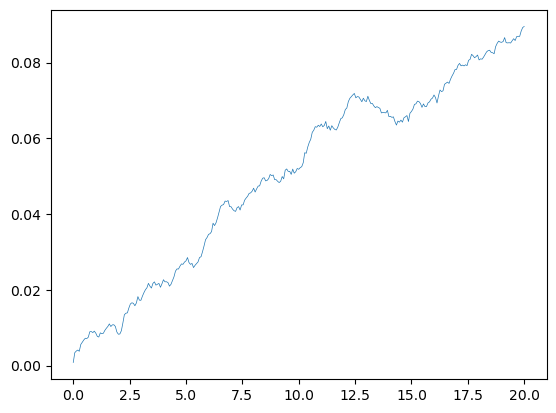

In [39]:
r_cm = np.sqrt(cm_x**2 + cm_y**2 + cm_z**2)
plt.plot(time, r_cm, linewidth=0.5)
#plt.savefig('R CM')

# Raggi Lagrangiani Teorici

$$
    \frac{M(r)}{M(tot)} = \frac{r}{r + R_s}
$$




  0%|                                                     | 0/8 [00:00<?, ?it/s]

 12%|█████▋                                       | 1/8 [00:00<00:02,  2.58it/s]

 25%|███████████▎                                 | 2/8 [00:00<00:02,  2.69it/s]

 38%|████████████████▉                            | 3/8 [00:01<00:01,  2.70it/s]

 50%|██████████████████████▌                      | 4/8 [00:01<00:01,  2.70it/s]

 62%|████████████████████████████▏                | 5/8 [00:01<00:01,  2.70it/s]

 75%|█████████████████████████████████▊           | 6/8 [00:02<00:00,  2.73it/s]

 88%|███████████████████████████████████████▍     | 7/8 [00:02<00:00,  2.75it/s]

100%|█████████████████████████████████████████████| 8/8 [00:02<00:00,  2.73it/s]


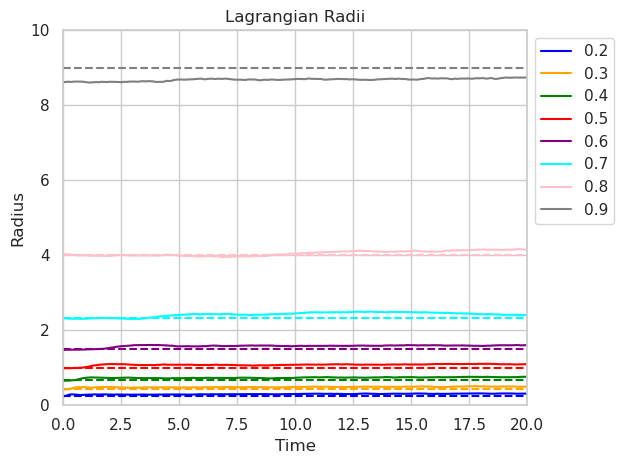

In [53]:
sns.set(style='whitegrid')

perc = [0.2,0.3,0.4,0.5,0.6,0.7, 0.8, 0.9]
colors = ['blue', 'orange', 'green', 'red', 'purple', 'cyan', 'pink', 'grey']

for p, c in tqdm(zip(perc, colors), total=len(perc)):
    r_L = []
    for i in range(len(time)):
        a    = np.sort(r[1:,i])
        mask = a<np.quantile(a,p)
        r_L.append(np.max(a[mask]))
    #Plot it
    r_L = np.array(r_L)
    R_teo = Rs * p / (1 - p)
    plt.plot(time,r_L, color=c, label=str(p))
    plt.axhline(y = R_teo, color=c, linestyle='--')


'''for i in range(0, N, 100):
    plt.plot(time,r[i], alpha=0.1)
'''
plt.ylim(0,10)
plt.xlim(0, np.max(time))
plt.xlabel('Time')
plt.ylabel('Radius')
plt.title('Lagrangian Radii')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig(f'Results/Lagrangian Radii {N} no perturber.png' )

# Energy Analysis

## Fetch data

In [43]:
from scipy import linalg

In [44]:
energy_file = f'Jaffe_log_no_perturber_{N}_eps_0.01.txt'

In [45]:
en_data = pd.read_csv(energy_file, header=None).to_numpy()
datas   = pd.read_csv(energy_file, header=None)

In [46]:
en_data.shape

(60300, 1)

In [47]:
####### remove some lines from the dataset###########
# Prento tutte le righe che contengono la parola 'time' e prendo la riga successiva
raws_to_keep = []

for i in range(0, len(en_data)):
    if '        time' in en_data[i][0]:
        raws_to_keep.append(i+1)

raws_to_keep = np.array(raws_to_keep)

In [48]:
en_data[1]

array(['   nbody     dtime       eps     theta   usequad     dtout     tstop'],
      dtype=object)

In [49]:
good_data = []
for index in raws_to_keep:
    good_data.append(en_data[index])

good_data = np.array(good_data)

In [50]:
times_energy = []
kinetic = []
potential = []

for i in range (0, len(good_data)):
    times_energy.append(float(good_data[i][0][6:12]))
    kinetic.append(float(good_data[i][0][21:28]))
    potential.append(float(good_data[i][0][30:36]))
                    

en_times = np.array(times_energy)
T = np.array(kinetic)
U = np.array(potential)
E_tot = T - U

E_med = np.average(E_tot)
E_stdev = np.std(E_tot)

## Total Energy
As we want to prove that the system is at the equilibrium, we can show it by computing the total energy of the system, defined as:

$$
    E(t) = K(t) + U(t)
$$

where K is the kinetic energy of the system and U is its potential energy.

For a system at the equilibrium we expect that the total energy of the system will be conserved.
The value of the energy of the system at each time are taken by the file "system_infos.txt" generated by the tree code. In the code below we simply fetch the data of our interest from the file (basically T and U).

Now we plot the potential, kinetic and total energy!

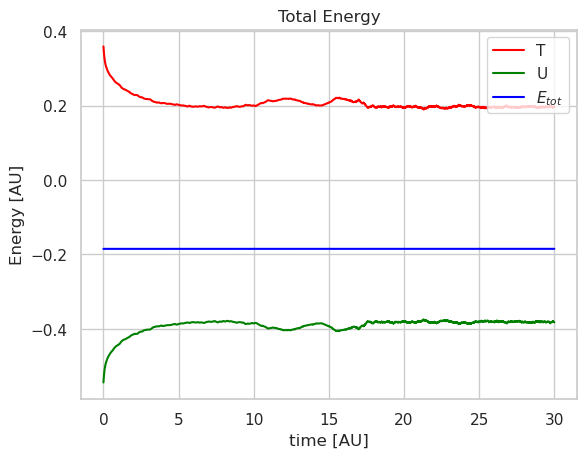

In [65]:
plt.plot(en_times, T, color='red', label='T')
plt.plot(en_times, -U, label='U', color='green')
plt.plot(en_times, E_tot, color='blue', label=r'$E_{tot}$')

plt.xlabel('time [AU]')
plt.ylabel('Energy [AU]')
plt.title('Total Energy')

plt.legend()

The total energy is negative, this means that we have a bound system. It seems also to be conserved, let's try to focus on it.

Text(0.5, 1.0, 'Total Energy')

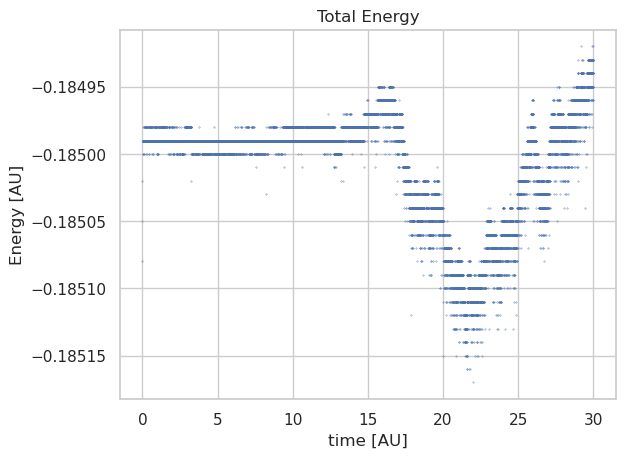

In [57]:
plt.scatter(en_times, E_tot, marker='.', s=0.3)
plt.xlabel('time [AU]')
plt.ylabel('Energy [AU]')
plt.title('Total Energy')

In [58]:
print('Mean energy: ', np.round(np.mean(E_tot), 2))
print('Rel. error:  ', np.round(abs(np.std(E_tot)/np.mean(E_tot))*100, 3),'%')

Mean energy:  -0.19
Rel. error:   0.022 %


It seems that the total energy has a steep growth at the very beginning of the simulation, and than it keeps growing but at a lower rate. Let's try to have an estimate of the relative error.

In [25]:
var = np.max(E_tot) - np.min(E_tot)
np.abs(var/E_med) * 100

21.16956735074112

In [26]:
Rel_err_perc = abs(E_stdev/E_med)*100
print(f'Relative error: {Rel_err_perc:.2f} %')

Relative error: 3.04 %


## Virial Ratio

In mechanics, the virial theorem provides a general equation that relates the average over time of the total kinetic energy of a stable system of discrete particles, bound by potential forces (forces characterized exclusively by potential difference), with that of the total potential energy of the system.

Let's now compute the virial ratio, the ratio of the total kinetic energy to the total potential energy. At the equilibrium, the virial ratio should approach $-0.5$.

In [59]:
virial_ratio = - T/U

Text(0, 0.5, 'Energy')

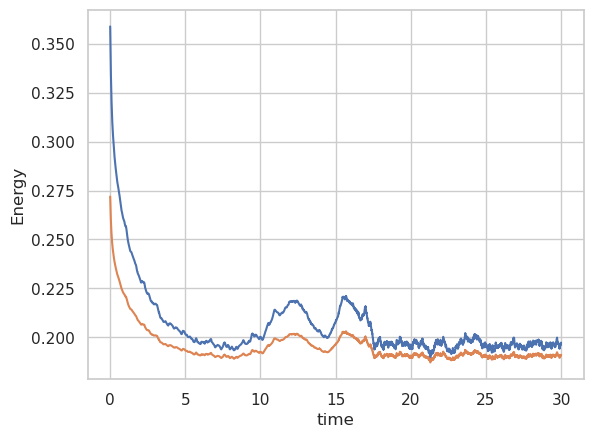

In [60]:
plt.plot(en_times, T, label='T')
plt.plot(en_times, U/2, label='-U/2')
plt.xlabel('time')
plt.ylabel('Energy')

Text(0.5, 1.0, 'Virial Ratio')

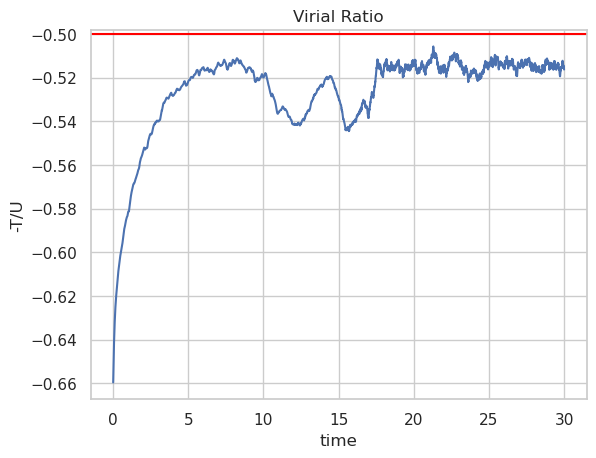

In [61]:
plt.plot(en_times, virial_ratio)
plt.xlabel('time')
plt.ylabel('-T/U')
plt.axhline(y=-0.5, color='red')
plt.title('Virial Ratio')

## Velocities distribution
Let's try to analyze the velocity distribution of the particles. At the equilibrium it should resamble a Maxwellian distribution. I try to compute it at $t = 11$ (where the virial ratio is closer to $-0.5$.

In the code below we tried to make an histogram with the velocity distribution at a given time (in particular at a time at which the virial ratio is $-0.5$ in order to check the distribution can be described with a Maxwell distribution.

We first computed the square module of the velocities and we computed $<v^2>$. So, we computed $k_B T$ as:

$$
   \frac{3}{2}N k_B T = \frac{1}{2} <v^2>  \Longrightarrow k_B T = \frac{1}{3} <v^2> \frac{1}{N}
$$

And so we plotted the velocities distribution in order to see if it is comparable with:

$$
    f(v) = \Big( \frac{M}{2 N \pi k_B T}\Big)^{\frac{3}{2}} 4 \pi v^2 \exp{\Big(- \frac{M v^2}{2 N k_B T}\Big)}
$$

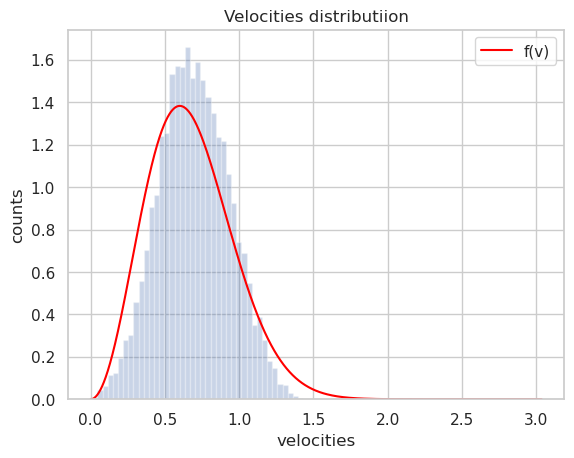

In [62]:
from scipy.stats import maxwell
velocities = np.zeros(N)
f_v = np.zeros(N)

for i in range(0, N):
    velocities[i] = np.sqrt(v_x[i][165]**2 + v_y[i][165]**2 + v_z[i][165]**2)

v_med = np.mean(velocities)    
kT = 1/3 * v_med * 1/N  
sorted_velocities = np.sort(velocities)

for i in range(0, N):
    f_v[i] = (M/(N*2*np.pi*kT))**(3/2) * 4*np.pi*sorted_velocities[i]**2 * np.exp(- M/N * sorted_velocities[i]**2 / (2*kT))


plt.hist(np.sqrt(velocities), bins=50, alpha=0.3, density=True)
plt.plot(sorted_velocities, f_v, color = "red", label="f(v)")

plt.title("Velocities distributiion")
plt.xlabel("velocities")
plt.ylabel("counts")
plt.legend()